In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,6)
df=pd.read_csv('/Users/madinamukhambekova/Desktop/spearmint-vector-student-code/Week_08/data/friday.csv', parse_dates=True,index_col=0,sep=';')
df['time']=df.index.time
df=df.reset_index(drop=False)

- #### Calculate the total number of customers in each section


In [2]:
df.groupby('location')['customer_no'].count()

location
checkout    1502
dairy        932
drinks       844
fruit       1057
spices       790
Name: customer_no, dtype: int64

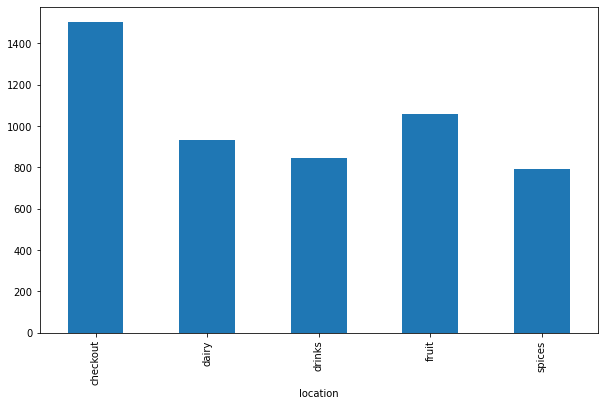

In [3]:
df.groupby('location')['customer_no'].count().plot.bar()

- #### Calculate the total number of customers in each section over time

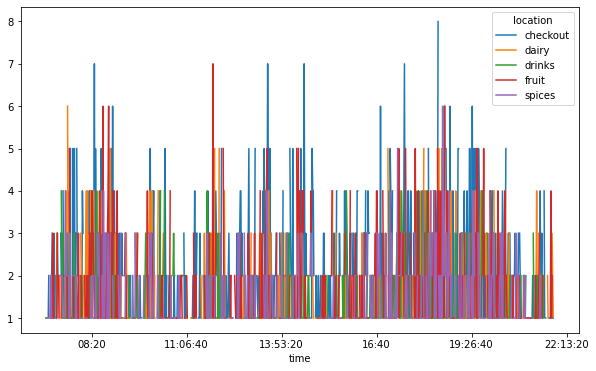

In [4]:
df.groupby(['time','location'])['customer_no'].count().unstack().plot()

- #### Display the number of customers at checkout over time

In [5]:
df[df['location']=='checkout'].groupby('time')['customer_no'].count()

time
07:01:00    1
07:02:00    1
07:04:00    1
07:05:00    2
07:09:00    1
           ..
21:37:00    1
21:45:00    1
21:47:00    2
21:48:00    2
21:50:00    2
Name: customer_no, Length: 686, dtype: int64

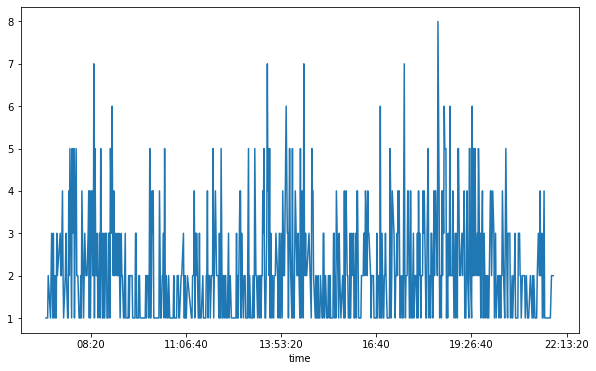

In [6]:
df[df['location']=='checkout'].groupby('time')['customer_no'].count().plot()

- #### Calculate the time each customer spent in the market

In [7]:
def get_diff(col):
    enters = col.min()
    leaves = col.max()
    minutes = (pd.Timestamp(leaves) - pd.Timestamp(enters)) / pd.Timedelta(minutes=1)
    return minutes
df.groupby('customer_no')['timestamp'].apply(get_diff)

customer_no
1        5.0
2        1.0
3       11.0
4        1.0
5       14.0
        ... 
1506     0.0
1507     2.0
1508     2.0
1509     0.0
1510     0.0
Name: timestamp, Length: 1510, dtype: float64


- #### Calculate the total number of customers in the supermarket over time.

In [8]:
df.groupby('time')['customer_no'].count()

time
07:00:00    3
07:01:00    3
07:02:00    3
07:03:00    3
07:04:00    3
           ..
21:46:00    5
21:47:00    4
21:48:00    7
21:49:00    4
21:50:00    6
Name: customer_no, Length: 877, dtype: int64

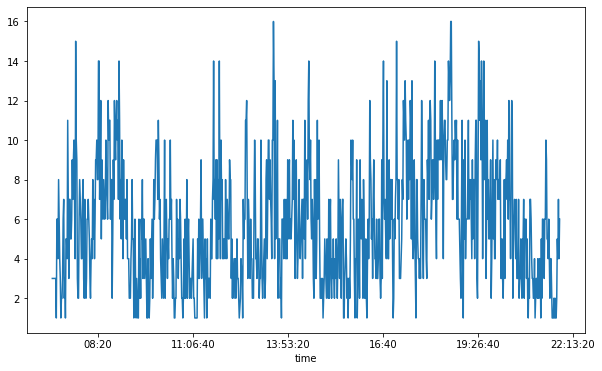

In [9]:
df.groupby('time')['customer_no'].count().plot()

- #### Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).

In [24]:
# # section	revenue per minute
# fruit=4
# spices=3
# dairy=5
# drinks=6

In [33]:
df['first_location'] = df.duplicated('customer_no')
first_location = df[df['first_location'] == False]
following = df[df['first_location'] == True]
first_location

,timestamp,customer_no,location,time,first_location
0,2019-09-06 07:00:00,1,dairy,07:00:00,False
1,2019-09-06 07:00:00,2,drinks,07:00:00,False
2,2019-09-06 07:00:00,3,fruit,07:00:00,False
4,2019-09-06 07:01:00,4,drinks,07:01:00,False
5,2019-09-06 07:01:00,5,dairy,07:01:00,False
...,...,...,...,...,...
5112,2019-09-06 21:48:00,1506,dairy,21:48:00,False
5113,2019-09-06 21:48:00,1507,dairy,21:48:00,False
5114,2019-09-06 21:48:00,1508,dairy,21:48:00,False
5123,2019-09-06 21:50:00,1509,drinks,21:50:00,False


next steps:
1. combine all days
2. add new column with weekday
3. define customer number+day
